## Importing Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Input , Dropout , ELU, BatchNormalization
from keras.regularizers import l1 , l2
from keras.callbacks import EarlyStopping

## Importing Make circle dataset

In [4]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

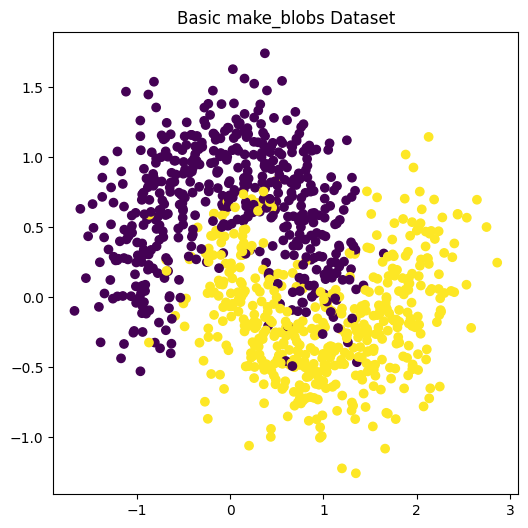

In [5]:
# Visualize
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Basic make_blobs Dataset")
plt.show()

## Plot Decision Boundary

In [6]:
def PlotDecisionBoundary(X, y, model):

    # Create mesh grid using X (not X_train)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Prepare grid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled, verbose=0)

    # Convert to class labels
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Early Stopping

In [48]:
callbacks = EarlyStopping(
    monitor='val_loss',
    min_delta=0.000001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

## Base Model

In [16]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train , y_train , epochs=100 , validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6591 - loss: 0.6530 - val_accuracy: 0.8500 - val_loss: 0.5232
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8413 - loss: 0.4990 - val_accuracy: 0.8571 - val_loss: 0.4020
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8515 - loss: 0.3930 - val_accuracy: 0.8571 - val_loss: 0.3324
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8233 - loss: 0.3882 - val_accuracy: 0.8571 - val_loss: 0.3030
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8336 - loss: 0.3538 - val_accuracy: 0.8714 - val_loss: 0.2925
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8683 - loss: 0.3216 - val_accuracy: 0.8714 - val_loss: 0.2858
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8603 - loss: 0.3217 - val_accuracy: 0.8714 - val_loss: 0.2843
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8437 - loss: 0.3374 - val_accuracy: 0.8643 - 

Text(0.5, 0, 'Epoch')

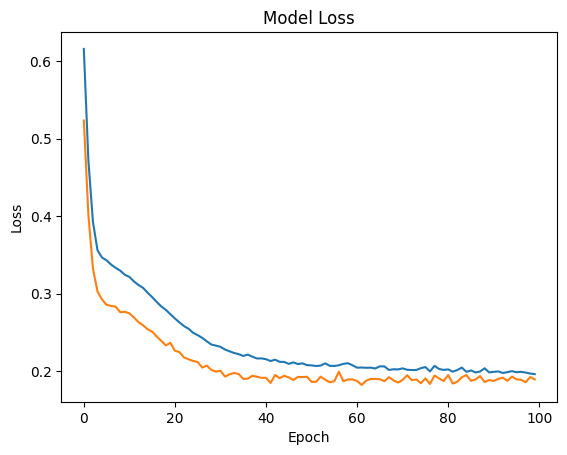

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [21]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


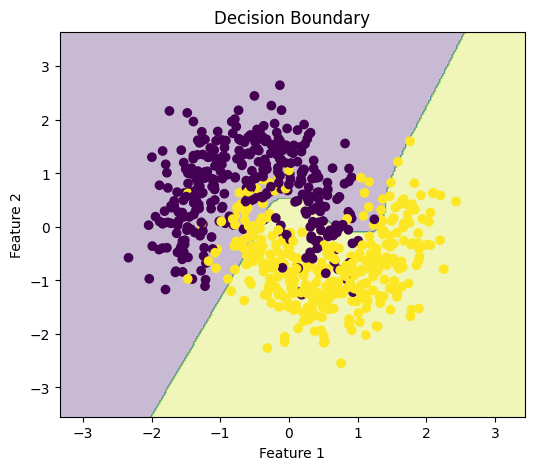

In [22]:
PlotDecisionBoundary(X_train, y_train, model)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9133333333333333
Precision: 0.946969696969697
Recall   : 0.8680555555555556
F1 Score : 0.9057971014492754


# Using ELU activation function

In [31]:
model = Sequential([
    Input(shape=(2,)),
    Dense(64),
    ELU(),
    Dense(64),
    ELU(),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_3 (ELU)                     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(X_train , y_train , epochs=100 , validation_split=0.2, callbacks=callbacks)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8838 - loss: 0.2658 - val_accuracy: 0.9286 - val_loss: 0.1960
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8974 - loss: 0.2469 - val_accuracy: 0.9286 - val_loss: 0.2236
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9026 - loss: 0.2558 - val_accuracy: 0.9286 - val_loss: 0.1951
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9057 - loss: 0.2355 - val_accuracy: 0.9357 - val_loss: 0.1954
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8962 - loss: 0.2658 - val_accuracy: 0.9286 - val_loss: 0.1829
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9159 - loss: 0.2418 - val_accuracy: 0.9357 - val_loss: 0.2193
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8876 - loss: 0.2595 - val_accuracy: 0.9357 - val_loss: 0.1806
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8866 - loss: 0.2802 - val_accuracy: 0.9357

Text(0.5, 0, 'Epoch')

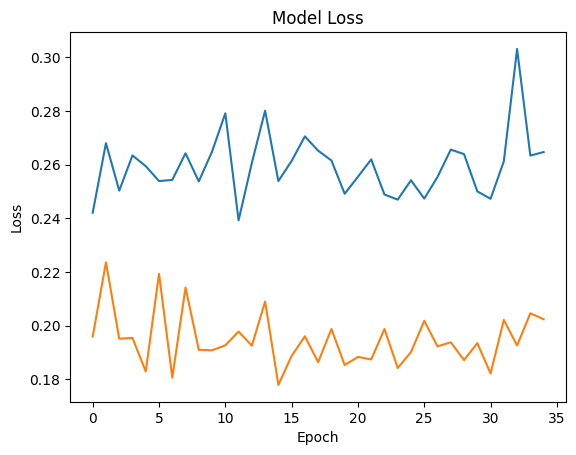

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [51]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


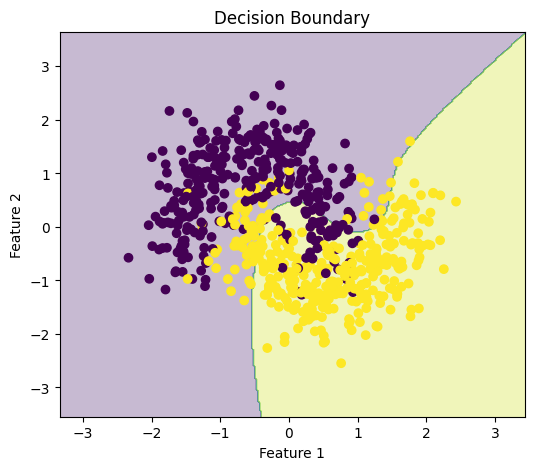

In [52]:
PlotDecisionBoundary(X_train, y_train, model)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9033333333333333
Precision: 0.9323308270676691
Recall   : 0.8611111111111112
F1 Score : 0.8953068592057761


# Batch Normalization

In [54]:
model = Sequential([
  Input(shape=(2,)),

  Dense(64),
  BatchNormalization(),
  ELU(),

  Dense(64),
  BatchNormalization(),
  ELU(),

  Dense(1 , activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [56]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_6 (ELU)                     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_7 (ELU)                     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 256 (1.00 KB)

In [57]:
history = model.fit(X_train , y_train , epochs=100 , validation_split=0.2, callbacks=callbacks)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7214 - loss: 0.5270 - val_accuracy: 0.8500 - val_loss: 0.4393
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8522 - loss: 0.3410 - val_accuracy: 0.8714 - val_loss: 0.4350
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8464 - loss: 0.3608 - val_accuracy: 0.8643 - val_loss: 0.4414
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8763 - loss: 0.3161 - val_accuracy: 0.8643 - val_loss: 0.4061
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.3320 - val_accuracy: 0.8714 - val_loss: 0.4197
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8514 - loss: 0.3482 - val_accuracy: 0.8857 - val_loss: 0.3998
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8584 - loss: 0.3329 - val_accuracy: 0.8857 - val_loss: 0.3886
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8837 - loss: 0.3234 - val_accuracy: 0.8857 - 

Text(0.5, 0, 'Epoch')

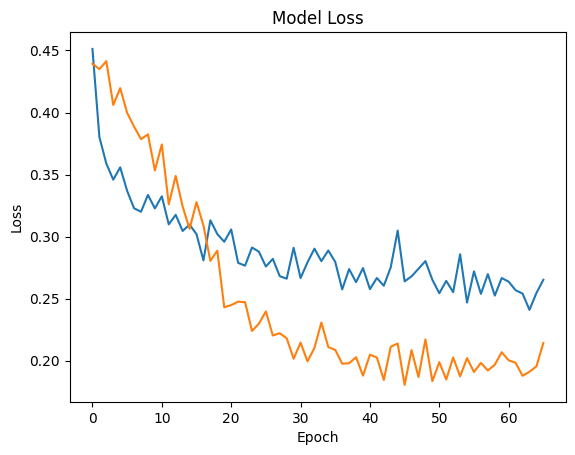

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [59]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


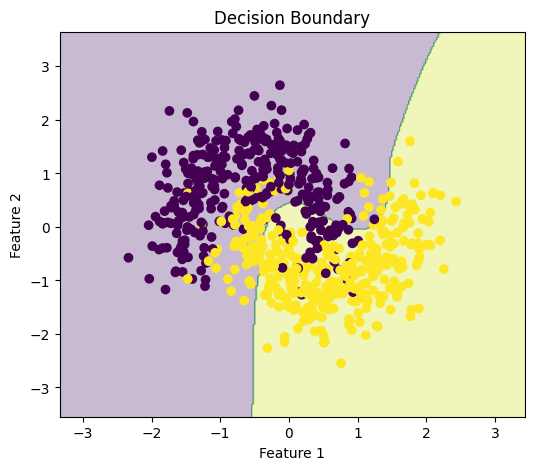

In [60]:
PlotDecisionBoundary(X_train, y_train, model)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.91
Precision: 0.9333333333333333
Recall   : 0.875
F1 Score : 0.9032258064516129
